In [ ]:
# importing modules
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
training_data = np.genfromtxt('test.csv', delimiter=',', \
                             dtype=np.int32)

print( np.shape(training_data))

(9812, 25)


In [3]:
df = pd.read_csv('./test.csv')

In [4]:
df

,FileName,Hash,FileSize,Entropy,IAT_Ratio,Section_corrupt,EntryPoint,Malware,DLL_Ch1,DLL_Ch2,...,DLL_Ch8,DLL_Ch9,DLL_Ch10,DLL_Ch11,DLL_Ch12,DLL_Ch13,DLL_Ch14,DLL_Ch15,DLL_Ch16,DLL_Ch17
0,0006f3982fbb13c7fa97f4fffbfead51.vir,0006f3982fbb13c7fa97f4fffbfead51,1571844,7.994200,0.500000,1,15750,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,000cf7d1523400b8304ea515f5447dc7.vir,000cf7d1523400b8304ea515f5447dc7,949252,6.390259,0.057143,1,4736,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0012ec11ae56e37e35232738e756cab2.vir,0012ec11ae56e37e35232738e756cab2,174788,6.445913,0.234043,0,47963,1,1,0,...,1,0,1,0,0,0,0,0,0,1
3,001736ee23846c570990c58a6381cf71.vir,001736ee23846c570990c58a6381cf71,24580,2.775063,0.000000,0,4688,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0035ff4b444acf489b847debae81fc0c.vir,0035ff4b444acf489b847debae81fc0c,722089,6.508731,0.138823,1,623992,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9806,fff621af41a168882551b8a5d0e972b8.vir,fff621af41a168882551b8a5d0e972b8,727556,7.907775,0.137803,1,1717125,1,1,0,...,1,0,1,0,0,0,0,0,0,1
9807,fff8ef9b45bbcb8aca7cb6acdef7d4ba.vir,fff8ef9b45bbcb8aca7cb6acdef7d4ba,1038484,6.812177,0.139535,1,5320,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9808,fff9386da527b906206963e396324919.vir,fff9386da527b906206963e396324919,680212,6.521871,0.021186,0,391438,0,1,0,...,1,0,1,0,0,0,0,0,0,0
9809,fff98fa462275f7c265321ba4439942c.vir,fff98fa462275f7c265321ba4439942c,1155080,3.619136,0.000000,0,1011678,1,1,0,...,1,0,1,0,1,0,0,0,0,0


In [6]:
Entropy = df.Entropy

(array([  1.,   3.,   0.,   1.,  17.,   4.,   2.,   3.,   4.,   6.,   4.,
          5.,  16.,  41.,  31.,  10.,   3.,   6.,  14.,   4.,  11.,   7.,
         21.,   6.,  10.,  60.,  15.,  68.,  56.,  17.,  44.,  61.,  21.,
         42.,  53.,  50.,  65.,  38.,  39.,  51.,  56., 119.,  63.,  44.,
         76.,  61.,  67.,  95., 139., 199., 111., 104., 108., 150., 205.,
        172., 154., 222., 219., 205., 274., 285., 358., 476., 422., 429.,
        291., 252., 357., 422., 187., 187., 179., 133., 182., 206., 200.,
        315., 392.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
        5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
        6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
        7.8, 7.9]),
 <

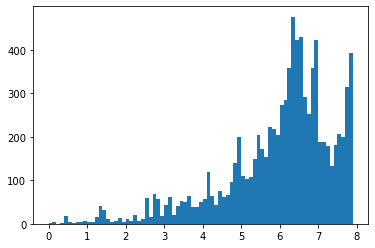

In [7]:
#정제되기전 Entropy 값
plt.hist(Entropy, bins=np.arange(0, 8, 0.1))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a91c3f3b48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a91c3f8e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a91c3f32c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a91c3f8fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a91c3fcec8>],
 'means': []}

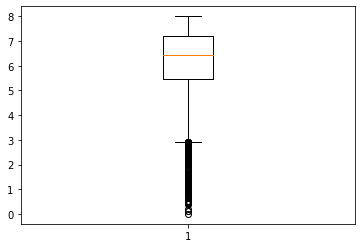

In [8]:
plt.boxplot(Entropy)

In [9]:
mean =np.mean(Entropy)
std = np.std(Entropy)

In [18]:
# 제거된 극단치값 가져오기
def outlier_list(series):
    b = series.index
    a = b +2
    
    out_list = pd.Series(series.values, a)
    return out_list

In [11]:
# 극단치가 아래에 있으므로 아래 값만 지운다.
def remove_lowest_outlier(series):
    x = series
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    
    iqr = q3 - q1
    lowest = q1 - (iqr * 1.5)
    highest = q3 + (iqr * 1.5)
    #제거할 극단치
    out_series = x[(x < lowest)]
    
    outlier_index = x[( x < lowest)].index
    print(len(outlier_index))
    x.drop(outlier_index, axis =0, inplace=True)
    print(x.shape)
    
    
    print("lowest : ",lowest)
    
    print("q1 : ", q1)
    print("q3 : ", q3)
    return x, out_series

In [12]:
out_entropy, out_series = remove_lowest_outlier(Entropy)

430
(9381,)
lowest :  2.9041806802681824
q1 :  5.470307675475844
q3 :  7.181059005614285


In [14]:
out_series

3       2.775063
8       1.511349
55      1.419146
71      0.994299
79      0.788402
          ...   
9745    1.318163
9765    0.494093
9780    2.514631
9789    2.767740
9793    2.516825
Name: Entropy, Length: 430, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a91c475548>,
 'caps': [<matplotlib.lines.Line2D at 0x1a91c486fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a91c47efc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a91c48c9c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a91c48ce88>],
 'means': []}

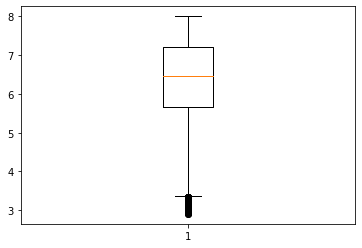

In [15]:
# 극단치가 제거된 boxplot
plt.boxplot(out_entropy)

In [19]:
new_out_series = outlier_list(out_series)

In [20]:
new_out_series

5       2.775063
10      1.511349
57      1.419146
73      0.994299
81      0.788402
          ...   
9747    1.318163
9767    0.494093
9782    2.514631
9791    2.767740
9795    2.516825
Length: 430, dtype: float64